In [29]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

from pydeseq2.utils import build_design_matrix
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.default_inference import DefaultInference
#from pydeseq2.ds import DeseqStats

In [31]:
from dds import pydeseq2CN_data
from inference import Inference
from def_inference import DefInference
import utils_pydeseq2CN

In [33]:
import dds_stat
from dds_stat import pydeseq2CN_Stats

In [39]:
# Loading the data from package

In [101]:
# Test simulated data
#DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
#counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv_v2.csv"), index_col=0)
#counts_df = counts_df.T
#metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_v2.csv"), index_col=0)
#cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_v2.csv"), index_col=0)
#cnv = cnv.T

In [51]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/colon/test"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_test_all_genes.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_all_genes.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_test_all_genes.csv"), index_col=0)
cnv = cnv.T

In [53]:
inference = DefInference(n_cpus=8)
dds = pydeseq2CN_data(
    counts=counts_df,
    metadata=metadata,
    cnv=cnv,
    design_factors="condition",
    inference=inference,
    refit_cooks=True
)
dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()
    
# Statistical analysis
stat_res = pydeseq2CN_Stats(dds, 
                            alpha=0.05, 
                            independent_filter=True, 
                            cooks_filter=True)
stat_res.run_wald_test()

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.lfc_shrink(coeff="condition_B_vs_A")
stat_res.summary()

OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/results/COAD"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNaware_all_genes.csv"))

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.58 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 1.94 seconds.

Fitting LFCs...
... done in 1.19 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 898 outlier genes.

Fitting dispersions...


replace_mask before filtering: (24, 898)
Number of True values in replace_mask: 944
replacement_counts_trimmed shape: (24, 898)


... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.08 seconds.

Running Wald tests...
... done in 0.55 seconds.

/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:1599: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(A, b)[0]
Fitting MAP LFCs...


Log2 fold change & Wald test p-value: condition B vs A
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1CF      1253.058267       -2.342760  0.444231 -5.759829  8.419902e-09   
A2M      13828.341423       -1.652472  0.270713 -6.587581  4.470512e-11   
A2M-AS1     21.736545       -1.105539  0.356821 -3.298084  9.734696e-04   
A4GALT     345.343006        0.008342  0.355876  0.025563  9.796059e-01   
AAAS      1371.575328        0.232508  0.196656  1.176146  2.395364e-01   
...               ...             ...       ...       ...           ...   
ZXDC      1038.869133        0.238040  0.160578  1.576662  1.148733e-01   
ZYG11B    1152.431628       -0.787426  0.325634 -2.673369  7.509353e-03   
ZYX       6392.103122        0.460385  0.296576  1.896184  5.793576e-02   
ZZEF1     5508.618169       -1.682500  0.225393 -8.014685  1.104199e-15   
ZZZ3      1079.486722        0.426202  0.278090  1.764019  7.772871e-02   

                 padj  
A1CF     8.036211e-0

... done in 1.81 seconds.



In [11]:
#OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/results/replicates_pydeseq/"
#os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
#stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "6_res_CNaware_10_1000.csv"))

In [55]:
#dds.obsm["size_factors"]
#dds.varm["fitted_dispersions"]
#print(
    #f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
#)
#dds.varm["MAP_dispersions"]
#dds.varm["LFC"]

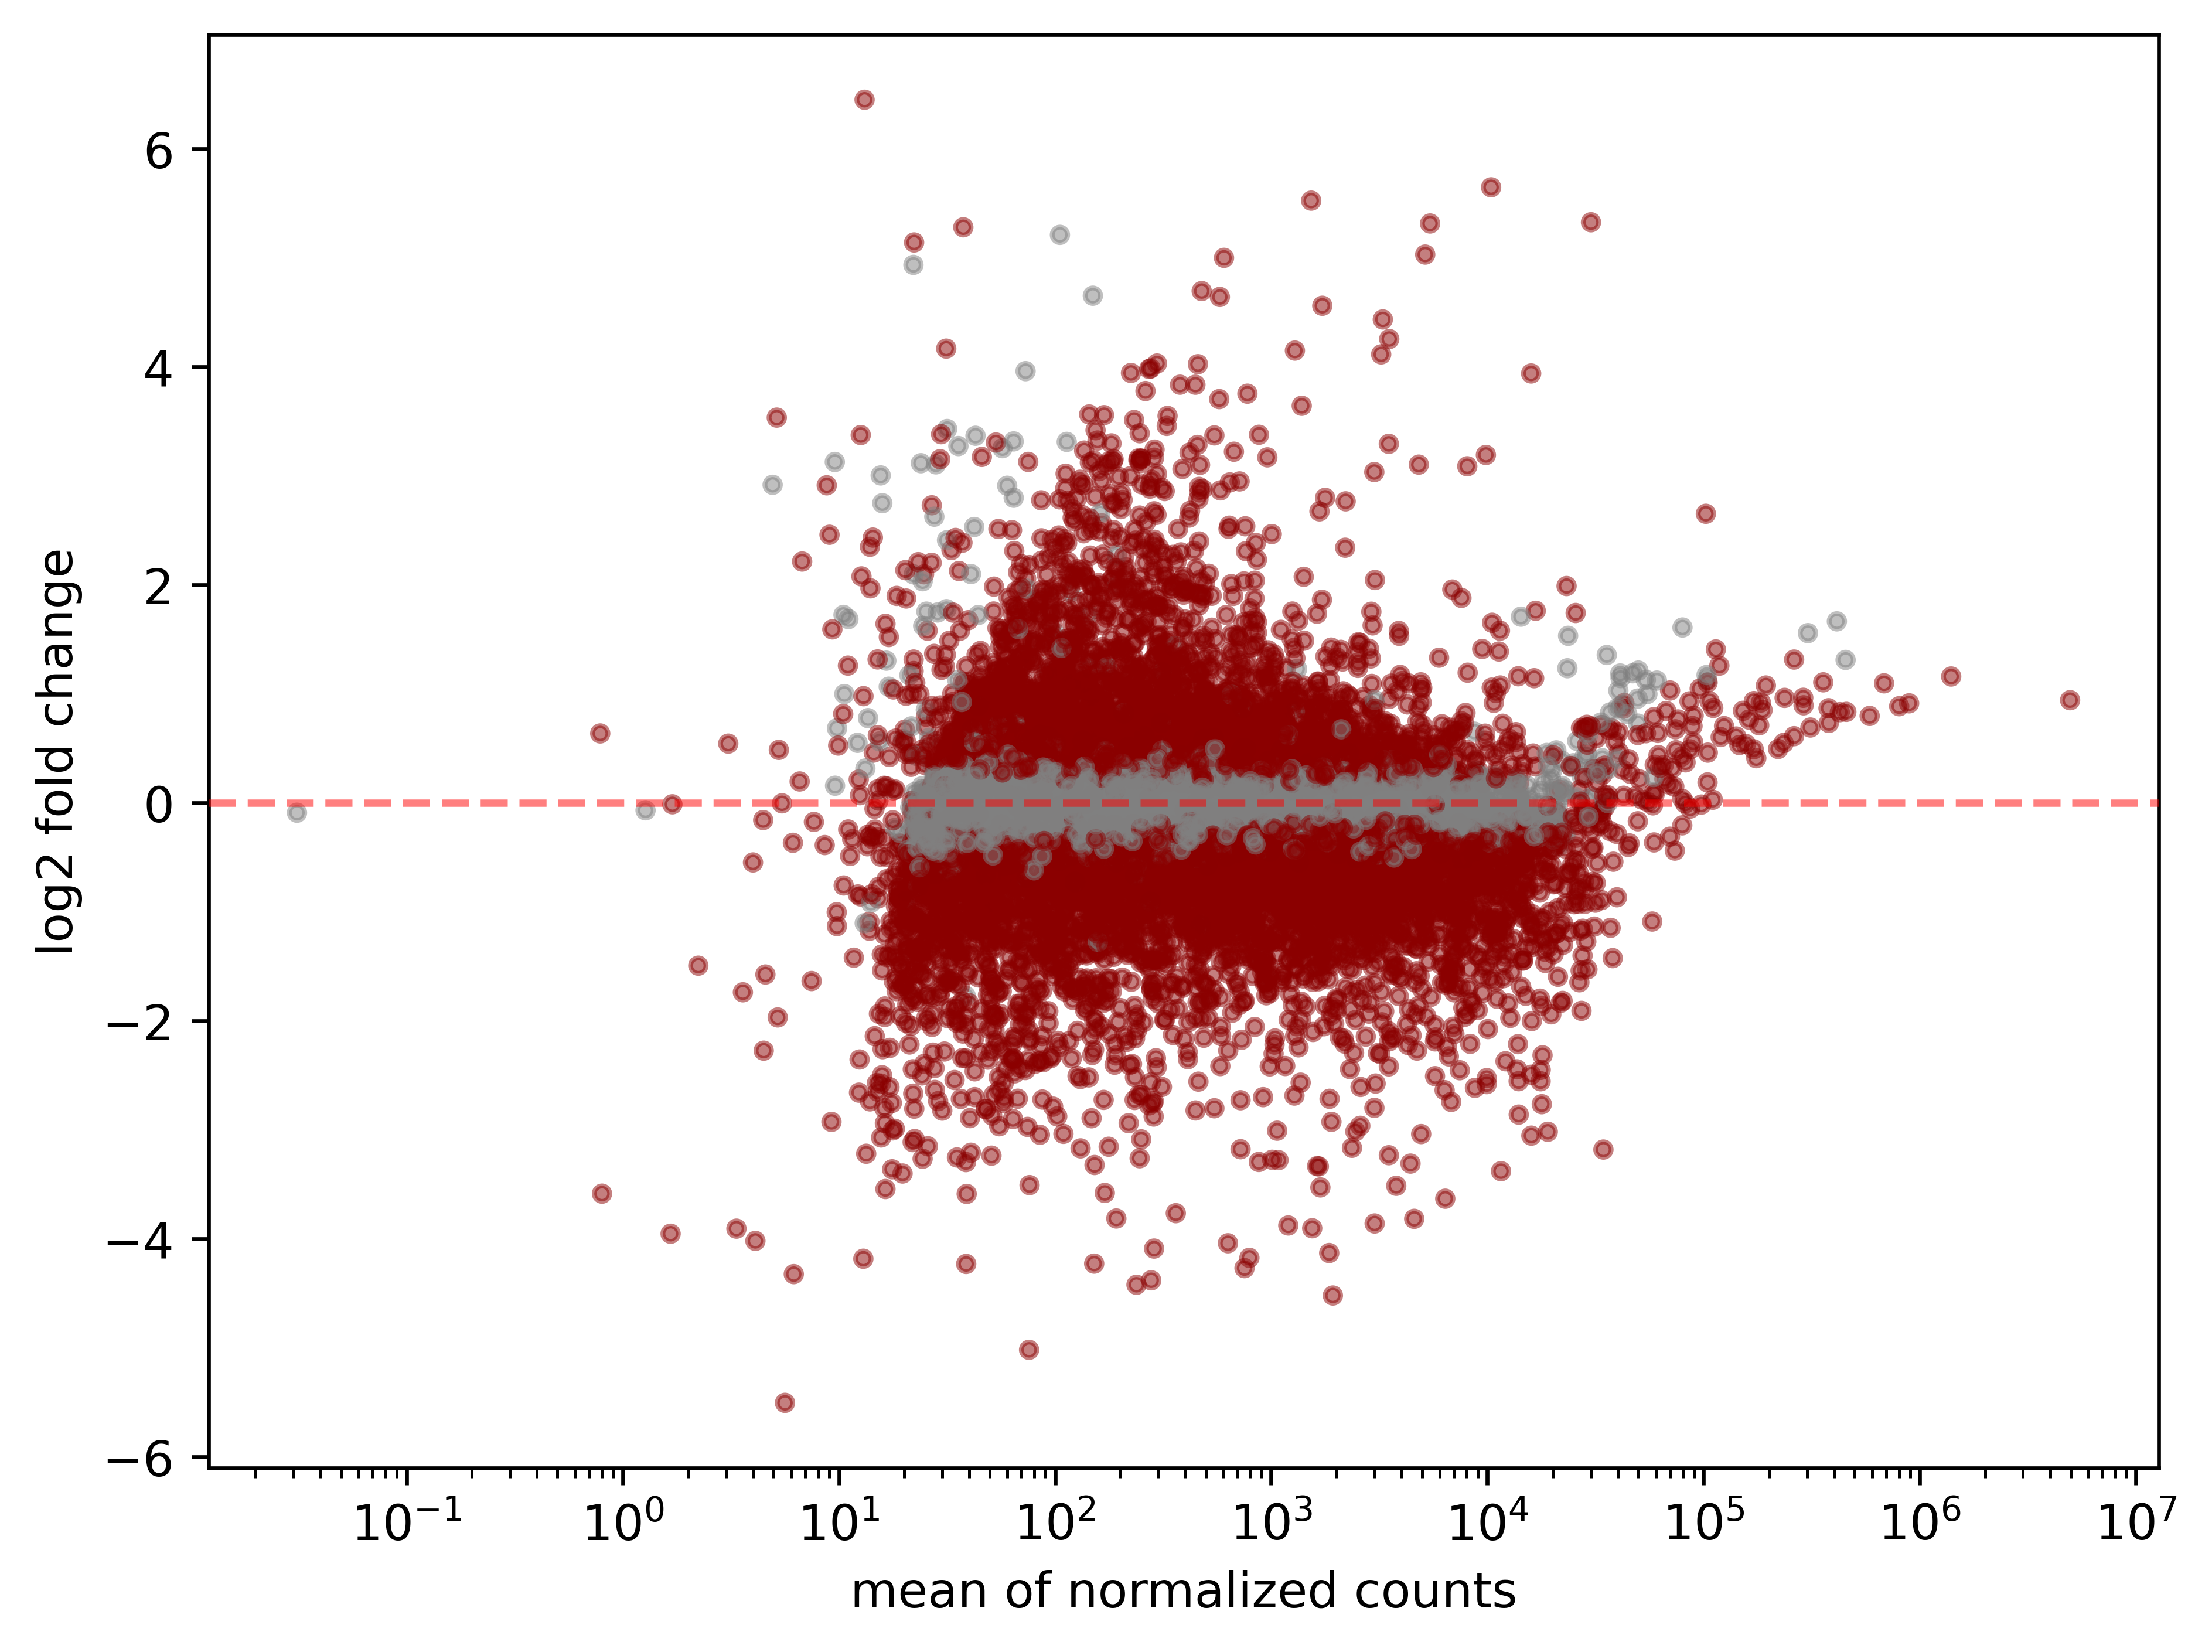

In [19]:
stat_res.plot_MA(s=10)